# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction, and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Perform a linear regression using self-constructed functions
* Calculate the coefficient of determination using self-constructed functions
* Use the coefficient of determination to determine model performance

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the Python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [73]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
Y = np.array([7, 7, 8, 9, 9, 10, 10, 11, 11, 12], dtype=np.float64)

def sq_err(y_real, y_predicted):
    errors = []
    for index, value in enumerate(y_real):
        error = value - y_predicted[index]
        errors.append(error**2)
        
    return round(sum(errors),2)

def r_squared(y_real, y_predicted):
    sse = sq_err(y_real, y_predicted)
    sst = sum((y_real - y_real.mean())**2)
    return 1 - sse/sst

def calc_slope(xs,ys):
    num = np.mean(xs)*np.mean(ys) - np.mean(xs*ys)
    denom = (np.mean(xs)**2) - np.mean(xs*xs)
    return round(num/denom,2)

def best_fit(xs, ys):
    m = calc_slope(xs, ys)
    c = np.mean(ys) - m*np.mean(xs)
    return m, c

def reg_line (m, c, xs):
    ys = []
    for x in xs:
        ys.append(m*x + c)
    return ys

def plot_reg(X, Y, Y_pred):
    plt.scatter(X, Y, color='#003F72', label='data')
    plt.plot(X, Y_pred, label='regression line')
    plt.legend(loc=4)
    plt.show()
    return None

In [80]:
m, c = best_fit(X,Y)
y_pred = reg_line(m, c, X)
r_sq = r_squared(Y,y_pred)
print(f'Slope: {m}\nY-intercept: {c}\nR-Squared: {r_sq}\nModel: Y = {m}*X + {c}')

Slope: 0.56
Y-intercept: 6.32
R-Squared: 0.9715909090909091
Model: Y = 0.56*X + 6.32


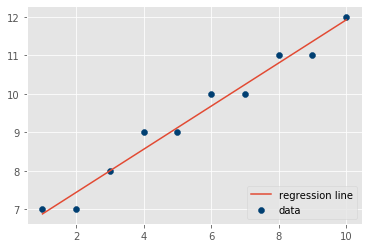

In [81]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33
plot_reg(X, Y, y_pred)

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

ValueError: x and y must have same first dimension, but have shapes (20,) and (10,)

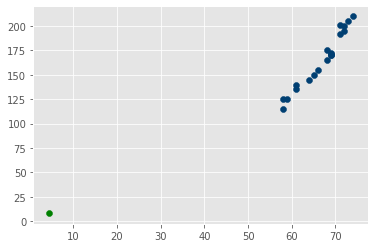

In [89]:
# Make prediction for x = 4.5 and visualize on the scatter plot
new_x = 4.5
new_y = m*new_x + c
plt.scatter(X, Y, color='#003F72', label='data')
plt.scatter(new_x,new_y,color='green')
plt.plot(X, y_pred, label='regression line')
plt.legend(loc=4)
plt.show()

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use Python's built-in modules to perform similar analyses with a much higher level of sophistication. 

In [90]:
import pandas as pd
df = pd.read_csv('heightweight.csv')
X = df.height
Y = df.weight

Slope: 5.54
Y-intercept: -204.54899999999998
R-Squared: 0.9553100230761513
Model: Y = 5.54*X + -204.54899999999998


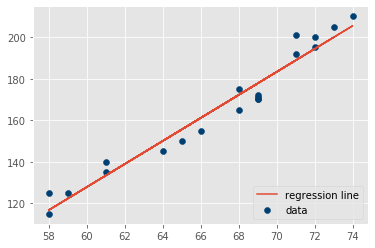

In [92]:
m, c = best_fit(X,Y)
y_pred = reg_line(m, c, X)
r_sq = r_squared(Y,y_pred)
print(f'Slope: {m}\nY-intercept: {c}\nR-Squared: {r_sq}\nModel: Y = {m}*X + {c}')
plot_reg(X, Y, y_pred)